In [3]:
import numpy as np
import pylab as plt
import random as rn 

In [5]:
#diff equations evolve with continuos state and deterministically

def removal(state):#estimation of rates of transitions, 
    return state*0.1 #no unit.

def increase(state):
    return 1

transitions = [removal, increase]
transitions_names = ["removal", "increase"]

In [17]:
state = 5 #Markovian: we need only the current state.

In [16]:
#we'll see systems not deterministic, Stocastic simulation 
# algorithm or Guillespie algorithm.

#apply the functions that extimate my rates
rates = [f(state) for f in transitions]
rates #in a given amount of time,the probability tha I gain a particle
#is double the prob that i lose a particle.

[0.5, 1]

In [18]:
"""
we don't have continuos values and it's a stocastic process, so
ther's only a probability to have a specific number at a certain 
time

example:
State = number of particle or different particles.

two type of process : destruction and creation(constant rates)

I will converge to a probability distro of state.

moment by moment i study what happens to my system. Which is the
likelihhod I will increment or decrement the number of 
proteins?


"""



"\nwe don't have continuos values and it's a stocastic process, so\nther's only a probability to have a specific number at a certain \ntime\n\nexample:\nState = number of particle or different particles.\n\ntwo type of process : destruction and creation(constant rates)\n\nI will converge to a probability distro of state.\n\nmoment by moment i study what happens to my system. Which is the\nlikelihhod I will increment or decrement the number of \nproteins?\n\n\n"

In [20]:
total_rate = sum(rates)
total_rate

1.5

In [49]:
time = np.random.exponential(1/total_rate)
time

0.5871298684276207

In [59]:
#choose one event
normalized_rates = np.cumsum(rates)
normalized_rates /= normalized_rates[-1]
normalized_rates

array([0.33333333, 1.        ])

In [60]:
p = np.random.rand()
idx = np.searchsorted(normalized_rates, p)
event = transitions_names[idx]
event

'removal'

In [58]:
#orrr

rn.choices(transitions_names, weights=rates) #easier

['removal']

In [61]:
event = rn.choices(transitions_names, weights=rates)[0]
event

'increase'

In [62]:
#aplly the choice
if event == 'increase':
    state += 1
elif event == 'removal':
    state -= 1
else:
    raise ValueError("transition not recognized")

In [63]:
#Now the complete cycle: 
# remember to keep track of time!

import typing 
from enum import Enum

In [67]:
class Transition(Enum):
    INCREASE = "increase"
    DECREASE = "removal"
    
class Observation(typing.NamedTuple):
    state: typing.Any
    time_of_observation : float
    time_of_residency: float
    transtion: Transition

In [70]:
Observation(5,1.0,0.33,Transition.DECREASE) #nice framework

Observation(state=5, time_of_observation=1.0, time_of_residency=0.33, transtion=<Transition.DECREASE: 'removal'>)

In [78]:
transitions = [removal, increase]
transitions_names = [Transition.DECREASE, Transition.INCREASE]

In [80]:
observed_states = []
state = 5
total_time = 0.0
time_limit = 5.0

while total_time < time_limit:
    rates = [f(state) for f in transitions]
    total_rate = sum(rates)
    time = np.random.exponential(1/total_rate)
    event = rn.choices(transitions_names, weights=rates)[0]
    
    observation = Observation(state, total_time, time, event)
    print(observation)
    observed_states.append(observation)
    
    total_time += time
    
    if event == Transition.INCREASE:
        state += 1
    elif event == Transition.DECREASE:
        state -= 1
    else:
        raise ValueError("transition not recognized")

Observation(state=5, time_of_observation=0.0, time_of_residency=0.1470959318502992, transtion=<Transition.DECREASE: 'removal'>)
Observation(state=4, time_of_observation=0.1470959318502992, time_of_residency=1.2447704574455671, transtion=<Transition.INCREASE: 'increase'>)
Observation(state=5, time_of_observation=1.3918663892958663, time_of_residency=0.26442165952021135, transtion=<Transition.INCREASE: 'increase'>)
Observation(state=6, time_of_observation=1.6562880488160776, time_of_residency=1.5923879665472371, transtion=<Transition.DECREASE: 'removal'>)
Observation(state=5, time_of_observation=3.2486760153633147, time_of_residency=1.7424953453199188, transtion=<Transition.INCREASE: 'increase'>)
Observation(state=6, time_of_observation=4.991171360683234, time_of_residency=1.251503597674473, transtion=<Transition.INCREASE: 'increase'>)


In [83]:
#define a function


def simulation(starting_state, time_limit):
    observed_states = []
    state = starting_state
    total_time = 0.0

    while total_time < time_limit:
        rates = [f(state) for f in transitions]
        total_rate = sum(rates)
        time = np.random.exponential(1/total_rate)
        event = rn.choices(transitions_names, weights=rates)[0]

        observation = Observation(state, total_time, time, event)
        observed_states.append(observation)

        total_time += time

        if event == Transition.INCREASE:
            state += 1
        elif event == Transition.DECREASE:
            state -= 1
        else:
            raise ValueError("transition not recognized")
    return observed_states

In [90]:
time_limit = 100
result = simulation(starting_state=5, time_limit=time_limit)

In [91]:
len(result)

213

In [94]:
from collections import Counter

In [96]:
distribution = Counter()
for observation in result:
    state = observation.state
    residency_time = observation.time_of_residency
    distribution[state] += residency_time/time_limit
print(distribution)

Counter({7: 0.17226234480014496, 8: 0.1287031784902404, 6: 0.12247542588671483, 10: 0.11638330375067206, 11: 0.11234310450782552, 9: 0.10742569956598232, 12: 0.1063179972773131, 5: 0.060341363279145174, 13: 0.047188253314928666, 14: 0.02094208376106291, 15: 0.010637646505522102, 4: 0.004297267510367366, 16: 0.00012009094075405769})


In [97]:
import scipy.stats as st

<BarContainer object of 20 artists>

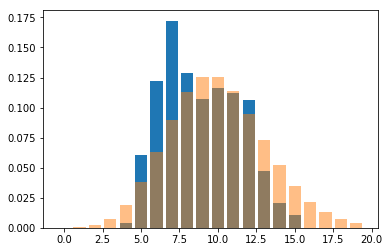

In [99]:
fig, ax = plt.subplots()
ax.bar(distribution.keys(), distribution.values())

values = np.arange(20)
pmf = st.poisson(10).pmf(values)
ax.bar(values, pmf, alpha=0.5)

#in orange the simulation I expect (poisson)
# in blue the result of the simulation
#we have a problem: random number converge with a looot of random
# number. With Markov process is even worse.

In [104]:
#tranform everything in a function

def generate_distribution(observation_sequence):
    distribution = Counter()
    for observation in observation_sequence:
        state = observation.state
        residency_time = observation.time_of_residency
        distribution[state] += residency_time/time_limit
        
    total_time_observed = sum(distribution.values())
    for state in distribution:
        distribution[state]/= total_time_observed
    return distribution


In [105]:
time_limit = 1_000
result = simulation(starting_state=5, time_limit=time_limit)
distribution = generate_distribution(result)

<BarContainer object of 20 artists>

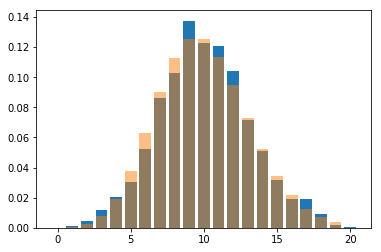

In [110]:
fig, ax = plt.subplots()
ax.bar(distribution.keys(), distribution.values())

values = np.arange(20)
pmf = st.poisson(10).pmf(values)
ax.bar(values, pmf, alpha=0.5)

#to check if the two are the same I should take the max differ
#of cumulatives and see how this decrease as I increase the 
#number of simulation, if that does not happens ther's a form of
#bias i'm not counting.

In [111]:
#this kind simulation is sensitive to 
# where I start the simulation.

time_limit = 1_000
result = simulation(starting_state=50, time_limit=time_limit)
distribution = generate_distribution(result)

<BarContainer object of 20 artists>

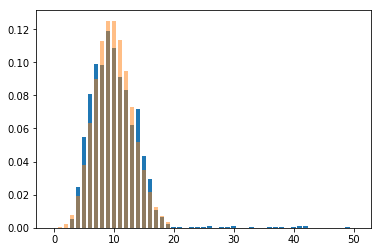

In [113]:
fig, ax = plt.subplots()
ax.bar(distribution.keys(), distribution.values())

values = np.arange(20)
pmf = st.poisson(10).pmf(values)
ax.bar(values, pmf, alpha=0.5)

#very skewed, the time it gets to reach normal state is lost.
# 50 is a very unlikely state.

In [114]:
#how can i control for this ind of beahaviour? 
#Multiple simulations and see what happens.

time_limit = 1_000
result_1 = simulation(starting_state=50, time_limit=time_limit)
result_2 = simulation(starting_state=50, time_limit=time_limit)
result_3 = simulation(starting_state=50, time_limit=time_limit)

In [116]:
def plot_observations(observation_sequence, ax=None):
    if ax is None:
        ax = plt.gca()#get current axes, or he create a new figure
    values = [obs.state for obs in observation_sequence]
    times = [obs.time_of_observation 
             for obs in observation_sequence]
    ax.plot(times, values, linestyle='steps-post')

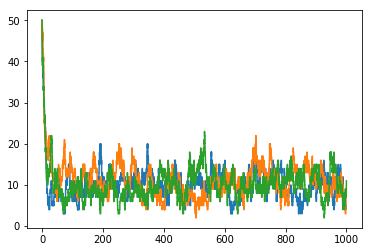

In [117]:
fig, ax = plt.subplots()
plot_observations(result_1)
plot_observations(result_2)
plot_observations(result_3)

In [118]:
# the first part of the simulations starting from 50 
#can be dropped. The significant part is the last.

In [119]:
#Exercise:

